# Time series forecasting (multivariate):

In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

Taking the data from the DATASET folder: (weatherHistory.csv)

In [439]:
df = pd.read_csv('C:/Users/astro/pythonprojects/DATASETS/weatherHistory.csv', index_col='Formatted Date', infer_datetime_format=True)
df = df.sort_index()
df.head(3)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-01-01 00:00:00.000 +0100,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,Mostly cloudy throughout the day.
2006-01-01 01:00:00.000 +0100,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.
2006-01-01 02:00:00.000 +0100,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.


### Rounding of the values:

In [440]:
df = df.round(3)

# Recreating index:

In [441]:

# 2006-01-01 -> 2016-12-31
df_index = pd.date_range(start='2006-01-01',periods=len(df), freq="H")

df.set_index(df_index,inplace=True)
# df = pd.DataFrame(data=df,index=df_index,columns=df.columns)
df = df[:'2014-12-31']
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
2006-01-01 00:00:00,Partly Cloudy,rain,0.578,-4.050,0.89,17.114,140.0,9.982,0.0,1016.66,Mostly cloudy throughout the day.
2006-01-01 01:00:00,Mostly Cloudy,rain,1.161,-3.239,0.85,16.615,139.0,9.902,0.0,1016.15,Mostly cloudy throughout the day.
2006-01-01 02:00:00,Mostly Cloudy,rain,1.667,-3.156,0.82,20.254,140.0,9.902,0.0,1015.87,Mostly cloudy throughout the day.
2006-01-01 03:00:00,Overcast,rain,1.711,-2.194,0.82,14.490,140.0,9.902,0.0,1015.56,Mostly cloudy throughout the day.
2006-01-01 04:00:00,Mostly Cloudy,rain,1.183,-2.744,0.86,13.943,134.0,9.902,0.0,1014.98,Mostly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,Clear,snow,-9.394,-14.872,0.68,11.077,38.0,15.182,0.0,1032.68,Clear throughout the day.
2014-12-31 20:00:00,Clear,snow,-8.889,-15.172,0.73,14.281,31.0,0.000,0.0,0.00,Clear throughout the day.
2014-12-31 21:00:00,Clear,snow,-8.889,-14.772,0.73,12.783,31.0,0.000,0.0,0.00,Clear throughout the day.
2014-12-31 22:00:00,Clear,snow,-9.717,-16.006,0.72,13.588,30.0,15.698,0.0,1033.05,Clear throughout the day.


## Information about the dataframe:

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78888 entries, 2006-01-01 00:00:00 to 2014-12-31 23:00:00
Freq: H
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   78888 non-null  object 
 1   Precip Type               78745 non-null  object 
 2   Temperature (C)           78888 non-null  float64
 3   Apparent Temperature (C)  78888 non-null  float64
 4   Humidity                  78888 non-null  float64
 5   Wind Speed (km/h)         78888 non-null  float64
 6   Wind Bearing (degrees)    78888 non-null  float64
 7   Visibility (km)           78888 non-null  float64
 8   Loud Cover                78888 non-null  float64
 9   Pressure (millibars)      78888 non-null  float64
 10  Daily Summary             78888 non-null  object 
dtypes: float64(8), object(3)
memory usage: 7.2+ MB


## Understanding string based parameters.

In [443]:
df['Precip Type'].value_counts()

rain    69376
snow     9369
Name: Precip Type, dtype: int64

In [444]:

df['Summary'].value_counts()

Partly Cloudy                          26109
Mostly Cloudy                          22379
Overcast                               13378
Clear                                   9483
Foggy                                   5884
Breezy and Mostly Cloudy                 445
Breezy and Overcast                      440
Breezy and Partly Cloudy                 339
Dry and Partly Cloudy                     84
Windy and Partly Cloudy                   61
Breezy                                    45
Windy and Overcast                        41
Breezy and Foggy                          34
Dry                                       34
Humid and Mostly Cloudy                   32
Windy and Mostly Cloudy                   31
Light Rain                                17
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Drizzle                                    5
Humid and Overcast                         5
Windy                                      5
Windy and 

## Converting these textual data to numerical data:

The following columns have string type data:

1) Summary

2) Precip Type

3) Daily Summary

# UPDATE: Dropping all one hot encoded columns since the model isn't predicting 0s and 1s correctly.

In [445]:
# df_with_dummies = pd.concat([df,Summary_encoded, pd.get_dummies(df['Precip Type']), pd.get_dummies(df['Daily Summary'])], axis=1)

## Prediction(forecasting) of temperature:

In [446]:
df.corr()['Temperature (C)'].sort_values()

Humidity                   -0.631998
Pressure (millibars)       -0.013752
Wind Speed (km/h)           0.010742
Wind Bearing (degrees)      0.029582
Visibility (km)             0.370908
Apparent Temperature (C)    0.992411
Temperature (C)             1.000000
Loud Cover                       NaN
Name: Temperature (C), dtype: float64

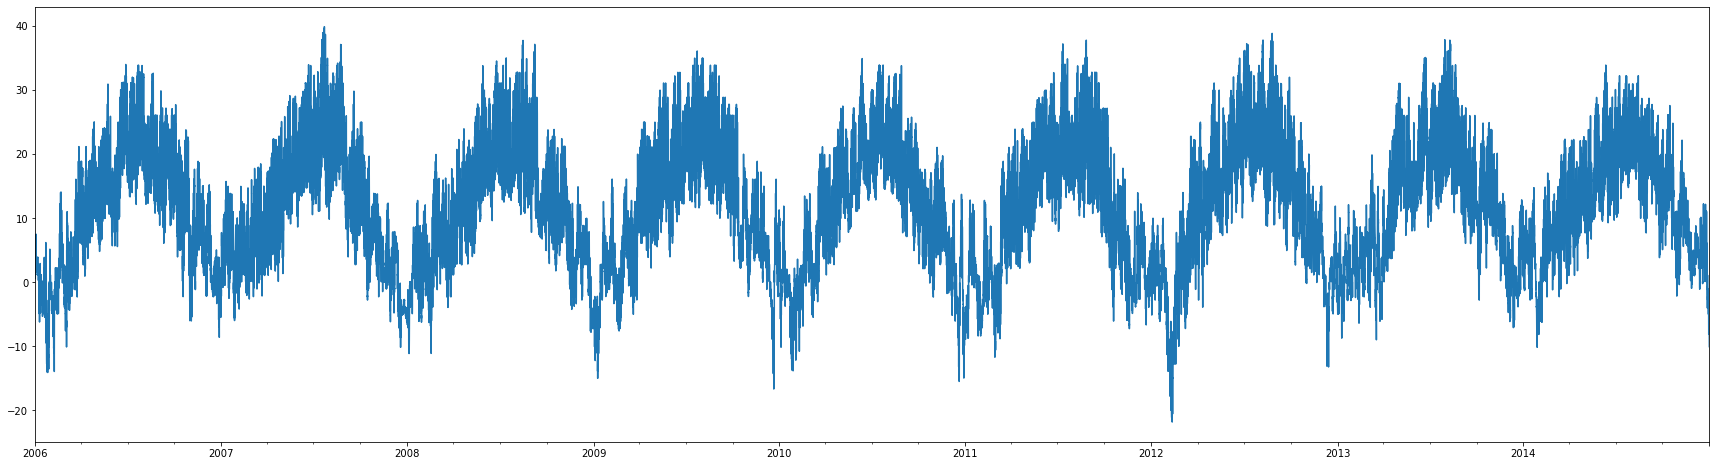

In [447]:
# plotting parameters:
df['Temperature (C)'].plot(figsize=(30,8))
plt.savefig('temp_in_days.png')

## UPDATE_2 : Removing the attributes which are less related to temperature.

In [448]:
df = df.drop(['Pressure (millibars)', 'Loud Cover',
              'Apparent Temperature (C)','Wind Speed (km/h)','Wind Bearing (degrees)'], axis=1)

In [449]:
# Checking the relation again:
df.corr()['Temperature (C)'].sort_values()

Humidity          -0.631998
Visibility (km)    0.370908
Temperature (C)    1.000000
Name: Temperature (C), dtype: float64

Dropping Unwanted string columns since we already one hot encoded them.

In [450]:
df = df.drop('Summary',axis=1)
df = df.drop('Precip Type', axis=1)
df = df. drop('Daily Summary',axis=1)

By looking at the data, each reading is recorded in one hour.

In [451]:
df = df.sort_index()

In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78888 entries, 2006-01-01 00:00:00 to 2014-12-31 23:00:00
Freq: H
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature (C)  78888 non-null  float64
 1   Humidity         78888 non-null  float64
 2   Visibility (km)  78888 non-null  float64
dtypes: float64(3)
memory usage: 2.4 MB


In [453]:
df = df.resample('D').mean()
df = df.resample('MS').mean()

Viewing the end data points of the dataframe.

# Data: 2006 to 2014

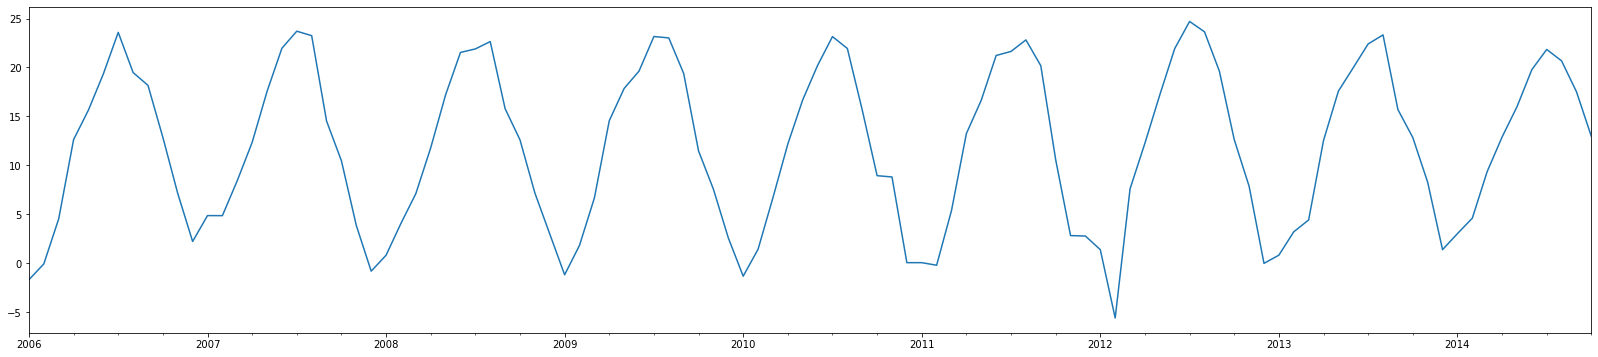

In [454]:
df_final = df.loc[:'2014-10-31']
df_final['Temperature (C)'].plot(figsize=(28,6))
plt.savefig('temperature_(2011-2014)_data_graph.png')

# Predicting months into future:

Use the following parameters if you want to predict in months.

In [455]:
# # How many rows per month?
rows_per_month=1

In [548]:
test_months = 28 #number of months we want to predict in the future.

Making test indices to extract test and train data from the whole data set.

In [549]:
test_indices = test_months*rows_per_month
test_indices

28

In [550]:
# train and test split:
train = df_final.iloc[:-test_indices]

# Choose the variable/parameter you want to predict
test = df_final.iloc[-test_indices:]

In [551]:
len(train)

78

# Scaling data:

In [552]:
from sklearn.preprocessing import MinMaxScaler

In [553]:
scaler = MinMaxScaler()


In [554]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

# Generator Parameters:

Creating a variable 'length' (make sure there is some periodicity in this length)

In [555]:
length =  12*rows_per_month #Length of output sequences (in number of timesteps)

In [556]:
batch_size = 1 #Number of timeseries sample in batch
generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [557]:
len(scaled_train)

78

In [558]:
len(generator)

66

In [559]:
X, y = generator[0]

In [560]:
X.shape, y.shape

((1, 12, 3), (1, 3))

# Creating the model

In [561]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [562]:
scaled_train.shape

(78, 3)

In [563]:
# define model
monthly_model = Sequential()

monthly_model.add(tf.keras.layers.LSTM(50, input_shape=(length,scaled_train.shape[1]),return_sequences=True))
monthly_model.add(tf.keras.layers.LSTM(50, return_sequences=True))
monthly_model.add(tf.keras.layers.LSTM(50, return_sequences=True))
monthly_model.add(tf.keras.layers.LSTM(50))
# monthly_model.add(tf.keras.layers.LSTM(50)) #add this layer if df is in 'days'

#NOTE: Do not specify the activation function for LSTM layers, this is because it will not run on GPU.
monthly_model.add(Dense(scaled_train.shape[1]))

monthly_model.compile(optimizer='adam', loss='mse')

In [564]:
monthly_model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_61 (LSTM)               (None, 12, 50)            10800     
_________________________________________________________________
lstm_62 (LSTM)               (None, 12, 50)            20200     
_________________________________________________________________
lstm_63 (LSTM)               (None, 12, 50)            20200     
_________________________________________________________________
lstm_64 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 153       
Total params: 71,553
Trainable params: 71,553
Non-trainable params: 0
_________________________________________________________________


## CallBacks

In [565]:
from tensorflow.keras.callbacks import EarlyStopping
from IPython.display import clear_output
# Callbacks:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('temp_forecast_model.h5',save_best_only=True)

validation_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=batch_size)

In [566]:
# Creating a custom callback:
class PlotLosses(tf.keras.callbacks.Callback):
    ls=[] #making a list for loss.
    vl_ls=[]
    epochs=[]
    def on_epoch_end(self,epoch,logs):
        #update lists on each epoch;
        self.ls.append(logs['loss'])
        self.vl_ls.append(logs['val_loss'])
        self.epochs.append(epoch)
        
        # Clearing the output after every epoch.
        clear_output(wait=True)
        
        #plot the list;
        plt.plot(self.epochs, self.ls)
        plt.plot(self.epochs, self.vl_ls)
        plt.legend(logs)
        plt.show()

plot_losses = PlotLosses()


# Training Model:

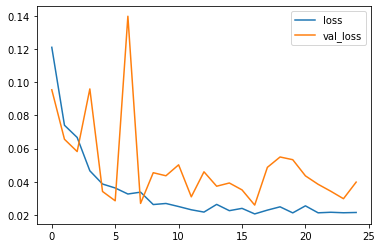

66/66 [==============================] - 1s 9ms/step - loss: 0.0215 - val_loss: 0.0398


In [567]:
monthly_model.fit(generator, epochs=25, validation_data=validation_generator,
          callbacks=[checkpoint_cb,plot_losses])

# Model History:

In [568]:
monthly_model.history.history.keys()

dict_keys(['loss', 'val_loss'])

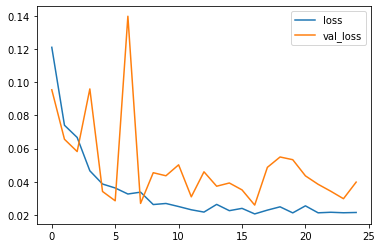

In [569]:
losses = pd.DataFrame(monthly_model.history.history)
losses.plot()

### Calling the best checkpoint model:

In [570]:
# monthly_model = tf.keras.models.load_model('monthly_model.h5')
monthly_model.save('monthly_model.h5',overwrite=True)

In [571]:
monthly_model = tf.keras.models.load_model('monthly_model.h5')

# Evaluation on Test Data:

In [572]:
first_eval_batch = scaled_train[-length:]

In [573]:
first_eval_batch.shape

(12, 3)

In [574]:
first_eval_batch = first_eval_batch.reshape((1,length,scaled_train.shape[1]))

In [575]:
monthly_model.predict(first_eval_batch)

array([[1.0286103 , 0.44063073, 0.90402865]], dtype=float32)

In [576]:
n_features = scaled_test.shape[1] #n_features = scaled_train.shape[1] =250 (for predicting all parameters in the next time stamp)
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
print(current_batch.shape)

(1, 12, 3)


In [577]:
for i in range(len(test)):
    #Get prediction 1 time stamp ahead
    current_pred = monthly_model.predict(current_batch)[0]
    #store prediction
    test_predictions.append(current_pred)

    #update the current batch to now include the prediction and drop the first value.
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)
    

In [578]:
true_predictions = scaler.inverse_transform(test_predictions)

## Inverse transform of test predictions

In [579]:
true_predictions.shape

(28, 3)

In [580]:
true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns,index=test.index)
true_predictions

,Temperature (C),Humidity,Visibility (km)
2012-07-01,24.544119,0.681098,11.439382
2012-08-01,24.890662,0.672383,11.405599
2012-09-01,20.446912,0.672150,10.918004
2012-10-01,9.501534,0.768331,8.576032
2012-11-01,4.963213,0.828616,7.632937
2012-12-01,2.989354,0.857314,7.352424
2013-01-01,0.727209,0.864261,7.146378
2013-02-01,-0.182863,0.813384,7.813749
2013-03-01,9.733577,0.685241,10.699504
2013-04-01,15.818861,0.674958,11.286285


In [581]:
test

,Temperature (C),Humidity,Visibility (km)
2012-07-01,24.699460,0.576250,11.616930
2012-08-01,23.646914,0.507527,11.858918
2012-09-01,19.632383,0.591500,11.699067
2012-10-01,12.635422,0.791774,9.773819
2012-11-01,7.867132,0.869333,8.626421
2012-12-01,-0.008345,0.882876,7.582297
2013-01-01,0.828089,0.892285,7.864598
2013-02-01,3.214510,0.862068,9.130429
2013-03-01,4.426802,0.811519,9.393728
2013-04-01,12.535140,0.689292,10.969296


## Concatanating the result and prediction (Temperature)

In [582]:
result_df = pd.concat([test['Temperature (C)'], true_predictions['Temperature (C)']],axis=1)

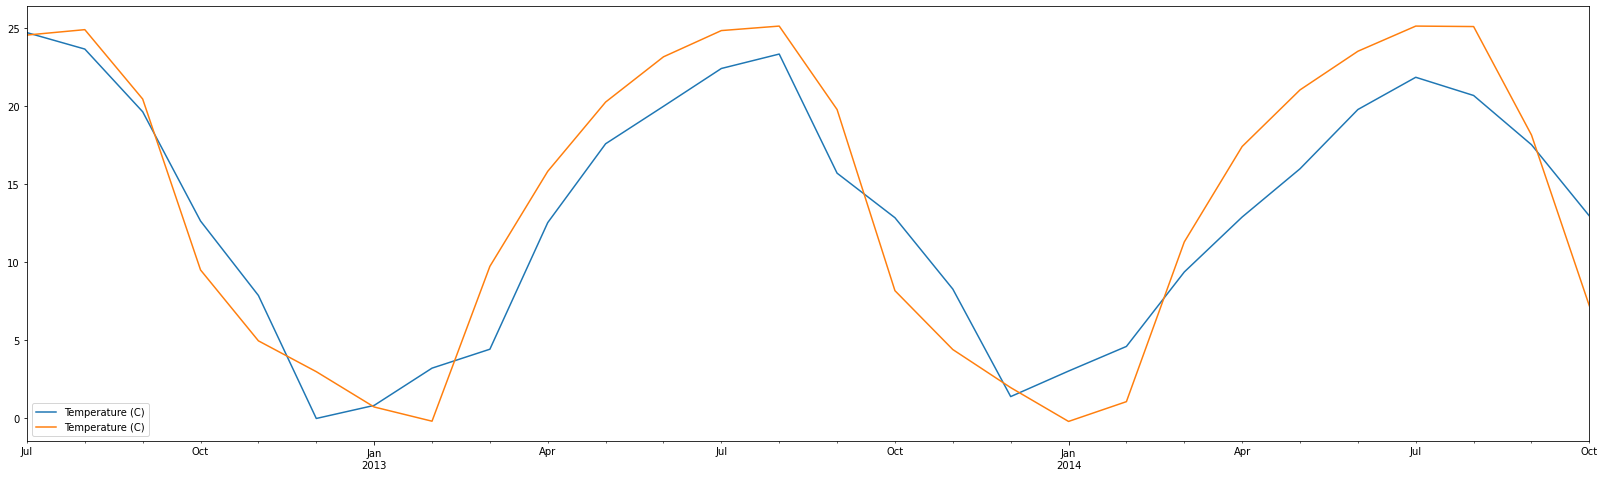

In [583]:
result_df.plot(figsize=(28,8))

# Forecasting:

If the above graph is good then proceed with forecasting:

### Scaling full data:

In [584]:
full_scaler = MinMaxScaler()

scaled_full_data = full_scaler.fit_transform(df)

In [614]:
length = 12*rows_per_month
generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)

In [628]:
# define model
monthly_model = Sequential()

monthly_model.add(tf.keras.layers.LSTM(50, input_shape=(length,scaled_train.shape[1]),return_sequences=True))
monthly_model.add(tf.keras.layers.LSTM(50, return_sequences=True))
monthly_model.add(tf.keras.layers.LSTM(50, return_sequences=True))
monthly_model.add(tf.keras.layers.LSTM(50, return_sequences=True))

monthly_model.add(tf.keras.layers.LSTM(50))
# monthly_model.add(tf.keras.layers.LSTM(50)) #add this layer if df is in 'days'

#NOTE: Do not specify the activation function for LSTM layers, this is because it will not run on GPU.
monthly_model.add(Dense(scaled_train.shape[1]))

monthly_model.compile(optimizer='adam', loss='mse')

In [641]:
final_model.fit(generator,epochs=105)


Epoch 1/105
96/96 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 2/105
96/96 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 3/105
96/96 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 4/105
96/96 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 5/105
96/96 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 6/105
96/96 [==============================] - 0s 4ms/step - loss: 9.4226e-04
Epoch 7/105
96/96 [==============================] - 0s 4ms/step - loss: 8.2294e-04
Epoch 8/105
96/96 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 9/105
96/96 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 10/105
96/96 [==============================] - 0s 4ms/step - loss: 9.4518e-04
Epoch 11/105
96/96 [==============================] - 0s 4ms/step - loss: 9.9141e-04
Epoch 12/105
96/96 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 13/105
96/96 [=

96/96 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 100/105
96/96 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 101/105
96/96 [==============================] - 0s 4ms/step - loss: 4.7166e-04
Epoch 102/105
96/96 [==============================] - 0s 4ms/step - loss: 3.0687e-04
Epoch 103/105
96/96 [==============================] - 0s 4ms/step - loss: 2.1659e-04
Epoch 104/105
96/96 [==============================] - 0s 4ms/step - loss: 1.7626e-04
Epoch 105/105
96/96 [==============================] - 0s 4ms/step - loss: 1.9440e-04


In [642]:
final_model.save('full_scale_model_timeseries(multivariate)_forecasting.h5',overwrite=True)

In [643]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 28*rows_per_month

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
    
    current_pred = final_model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [644]:
forecast = full_scaler.inverse_transform(forecast)

In [645]:

df.tail(3)

,Temperature (C),Humidity,Visibility (km)
2014-10-01,12.961069,0.823347,10.352121
2014-11-01,7.924546,0.836861,7.943365
2014-12-01,3.598187,0.841196,6.407918


#### forecasting index

In [646]:
forecast_index = pd.date_range(start='2015-01-01',periods=periods, freq="MS")
# https://stackoverflow.com/questions/35339139/where-is-the-documentation-on-pandas-freq-tags

forecast_df = pd.DataFrame(data=forecast,index=forecast_index,columns=df.columns+'_forecast')
# forecast_df

In [647]:
# df['Temperature (C)'].plot(figsize=(25,8))

In [648]:
# forecast_df['Temperature (C)_forecast'].plot()

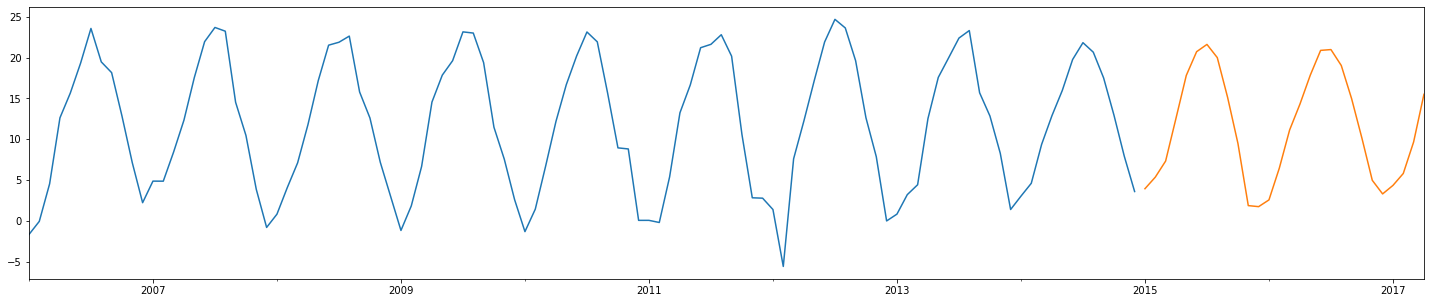

In [649]:
ax = df['Temperature (C)'].plot(figsize=(25,5))
forecast_df['Temperature (C)_forecast'].plot(ax=ax)
# plt.xlim('2014-09-09','2015-06-08')

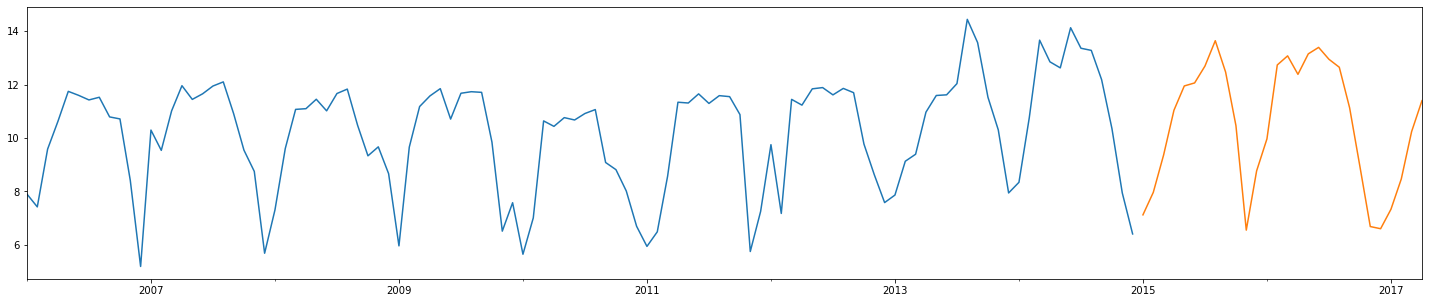

In [650]:
ax = df['Visibility (km)'].plot(figsize=(25,5))
forecast_df['Visibility (km)_forecast'].plot(ax=ax)

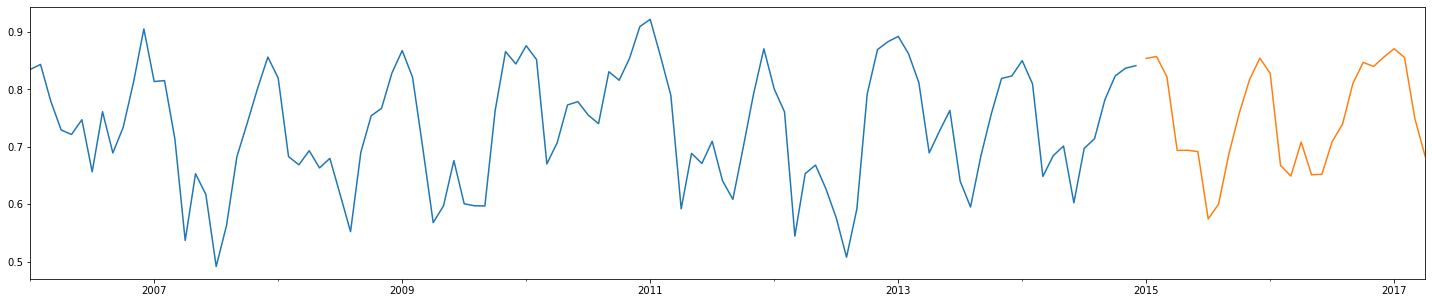

In [651]:
ax = df['Humidity'].plot(figsize=(25,5))
forecast_df['Humidity_forecast'].plot(ax=ax)